# Santander Customer Transaction Prediction

![](https://storage.googleapis.com/kaggle-media/competitions/santander/atm_image.png)

Importing and installing jovian, so that I can save my work whenever I need

In [ ]:
!pip install jovian --upgrade --quiet

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 78, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_

In [ ]:
!pip install jovian --upgrade --quiet  # Re-install jovian after kernel restart

import jovian  # Now the import should work

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.5 MB/s eta 0:00:00


Installing some other essential libraries for the project

In [ ]:
#restart the kernel after installation
!pip install numpy pandas-profiling matplotlib seaborn --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.9 MB/s eta 0:00:00


In [ ]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 33.8 MB/s eta 0:00:00


In [ ]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import sys
import warnings
warnings.filterwarnings("ignore")
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Problem Statement

> At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

> Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

> In this challenge, we need to help them identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

> View and download the data here: https://www.kaggle.com/competitions/santander-customer-transaction-prediction/data

## Downloading the Data

We can download the dataset from Kaggle directly within the Jupyter notebook using the `opendatasets` library. Make sure to [accept the competition rules](https://www.kaggle.com/competitions/santander-customer-transaction-prediction/rules) before executing the following cell.

In [ ]:
od.download('https://www.kaggle.com/competitions/santander-customer-transaction-prediction')

Skipping, found downloaded files in "./santander-customer-transaction-prediction" (use force=True to force download)


In [ ]:
import numpy as np

In [ ]:
os.listdir('santander-customer-transaction-prediction')

['sample_submission.csv', 'train.csv', 'test.csv']

#### Training Set

> For making to see the whole notebook at a fast pace, I selected some columns who are having the greater importances than others. I have taken 80k rows and 26 columns, as I tried earlier taking all the columns and observed over 20 mins kernel running on some cells individually.

> I also changed the data type from float 64 to float 16 so that every cell runs smoothly and instantaneously.

In [ ]:
%%time
df_dtype = {}
df_columns = ['target','var_81','var_12','var_53','var_139','var_99','var_170','var_146','var_44','var_80','var_166','var_177','var_6','var_174','var_110','var_26','var_109','var_198','var_190','var_22','var_21','var_133','var_148','var_179','var_0','var_86']
for name in df_columns:
    df_dtype[name] = np.float16

train_df = pd.read_csv('./santander-customer-transaction-prediction/train.csv', dtype=df_dtype, nrows = 80000, usecols = df_columns)

CPU times: user 1.15 s, sys: 39 ms, total: 1.19 s
Wall time: 1.19 s


In [ ]:
%%time
test_df = pd.read_csv('./santander-customer-transaction-prediction/test.csv')
test_df

CPU times: user 6.76 s, sys: 407 ms, total: 7.17 s
Wall time: 7.18 s


,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.6020,1.6570,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.2760,-6.8610,0.2780,17.0488,11.6704,3.1215,8.5093,5.6367,12.0099,14.2372,-

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="machine-learning-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jyotirmaysingh03/machine-learning-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jyotirmaysingh03/machine-learning-project


'https://jovian.ai/jyotirmaysingh03/machine-learning-project'

### Preprocessing and Data Analysis

Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations.

### Training Data Frame

In [ ]:
train_df.sample(20)

,target,var_0,var_6,var_12,var_21,var_22,var_26,var_44,var_53,var_80,var_81,var_86,var_99,var_109,var_110,var_133,var_139,var_146,var_148,var_166,var_170,var_174,var_177,var_179,var_190,var_198
49254,0.0,8.562500,5.675781,14.125000,1.202148,-0.211670,-0.923340,19.359375,5.855469,2.505859,13.726562,13.390625,-0.404785,21.000000,10.585938,6.457031,9.023438,12.023438,3.888672,3.619141,-2.099609,20.062500,13.359375,2.312500,3.001953,14.984375
4247,0.0,16.625000,7.730469,13.984375,28.406250,5.816406,2.416016,9.109375,7.792969,3.705078,16.546875,14.820312,0.964844,14.812500,7.699219,6.699219,5.265625,10.757812,4.089844,3.085938,2.708984,24.531250,9.460938,4.734375,-2.224609,18.875000
25402,0.0,13.281250,5.367188,14.281250,19.656250,3.857422,-5.476562,10.718750,5.773438,5.292969,15.656250,2.458984,-0.248047,19.125000,9.406250,7.257812,5.515625,7.074219,4.230469,2.345703,0.998535,24.000000,15.398438,2.015625,1.565430,16.328125
48703,0.0,8.460938,6.406250,14.187500,17.500000,-0.000600,-1.667969,11.195312,4.867188,2.097656,15.453125,17.406250,-3.044922,14.335938,5.156250,6.957031,6.722656,14.757812,3.906250,2.623047,-5.808594,29.156250,9.242188,2.945312,3.691406,14.968750
62535,0.0,10.437500,5.667969,13.906250,24.515625,3.060547,-2.207031,12.062500,7.015625,0.609863,15.382812,5.511719,-1.908203,20.250000,3.513672,7.312500,2.800781,9.359375,4.230469,2.900391,-0.961426,12.625000,11.937500,3.093750,-0.973633,17.500000
2300,0.0,9.007812,5.949219,14.132812,16.015625,0.781250,0.937500,11.843750,5.171875,1.049805,10.273438,8.875000,-0.525879,19.609375,-1.440430,7.039062,5.882812,10.820312,4.324219,2.927734,-5.296875,24.656250,9.898438,1.084961,11.703125,15.359375
39817,0.0,9.757812,5.796875,13.742188,17.593750,3.191406,3.417969,6.132812,5.214844,10.710938,12.367188,8.539062,-2.875000,23.734375,6.656250,7.242188,-2.369141,13.421875,4.089844,3.447266,-3.195312,29.156250,16.312500,0.974121,10.007812,21.187500
34382,1.0,8.460938,5.214844,13.867188,17.593750,9.968750,-5.414062,16.718750,6.808594,2.488281,15.367188,13.156250,-1.992188,21.921875,1.989258,6.292969,-2.949219,10.085938,3.701172,2.958984,5.031250,25.390625,11.945312,-0.104614,3.236328,11.648438
70873,1.0,17.203125,5.523438,13.554688,17.421875,4.558594,-9.460938,12.242188,6.898438,-1.994141,12.203125,0.244507,-0.326904,16.687500,7.289062,6.292969,8.171875,11.148438,3.738281,2.386719,0.517578,31.515625,13.039062,9.187500,7.906250,14.867188
18679,0.0,8.117188,7.085938,14.296875,12.031250,2.527344,-0.418457,2.781250,4.695312,8.015625,15.578125,-2.068359,2.199219,21.906250,7.214844,6.527344,9.203125,8.898438,3.750000,2.765625,0.518066,11.070312,12.335938,-2.951172,5.367188,15.320312


In [ ]:
train_df.shape

(80000, 26)

There are 26 columns and 80000 rows in the training set.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   target   80000 non-null  float16
 1   var_0    80000 non-null  float16
 2   var_6    80000 non-null  float16
 3   var_12   80000 non-null  float16
 4   var_21   80000 non-null  float16
 5   var_22   80000 non-null  float16
 6   var_26   80000 non-null  float16
 7   var_44   80000 non-null  float16
 8   var_53   80000 non-null  float16
 9   var_80   80000 non-null  float16
 10  var_81   80000 non-null  float16
 11  var_86   80000 non-null  float16
 12  var_99   80000 non-null  float16
 13  var_109  80000 non-null  float16
 14  var_110  80000 non-null  float16
 15  var_133  80000 non-null  float16
 16  var_139  80000 non-null  float16
 17  var_146  80000 non-null  float16
 18  var_148  80000 non-null  float16
 19  var_166  80000 non-null  float16
 20  var_170  80000 non-null  float16
 21  var_174  800

In [ ]:
train_df.isnull().sum().sum()

0

It is great to figure out that we don't need to deal with Nan elements in the training set

In [ ]:
train_df.describe()

,target,var_0,var_6,var_12,var_21,var_22,var_26,var_44,var_53,var_80,var_81,var_86,var_99,var_109,var_110,var_133,var_139,var_146,var_148,var_166,var_170,var_174,var_177,var_179,var_190,var_198
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.100586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.753418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006340,NaN,NaN,NaN,NaN,NaN
std,0.300781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min,0.000000,0.597656,2.384766,13.492188,-10.085938,-5.078125,-23.859375,-9.679688,3.441406,-18.046875,7.593750,-19.125000,-7.281250,5.910156,-9.242188,5.386719,-18.984375,0.427490,3.320312,1.851562,-14.257812,-2.375000,5.171875,-7.855469,-13.179688,6.300781
25%,0.000000,8.453125,4.769531,13.890625,11.546875,2.192871,-8.328125,5.304688,5.429688,0.724121,13.242188,0.418213,-2.111328,15.109375,2.773438,6.542969,2.451172,8.648438,3.853516,2.697266,-3.248047,15.023438,9.804688,0.635742,-0.089508,13.843750
50%,0.000000,10.531250,5.382812,14.023438,17.265625,4.261719,-4.195312,9.453125,6.023438,6.078125,14.867188,6.054688,-0.781250,18.281250,5.382812,6.804688,8.078125,10.398438,3.994141,2.958984,0.030197,20.156250,11.734375,2.513672,3.203125,15.937500
75%,0.000000,12.750000,6.000000,14.164062,23.078125,6.281250,-0.083466,13.085938,6.539062,11.445312,16.359375,11.156250,0.518188,21.859375,8.117188,7.070312,13.265625,12.117188,4.128906,3.240234,3.103516,25.640625,13.929688,4.398438,6.417969,18.062500
max,1.000000,20.312500,8.445312,14.640625,49.031250,14.382812,15.429688,28.328125,8.234375,30.484375,23.125000,31.781250,4.738281,31.546875,19.312500,8.187500,36.093750,19.296875,4.722656,4.214844,16.734375,41.937500,20.593750,13.328125,18.437500,26.031250


In [ ]:
target_values = train_df.target.value_counts()
target_values

0.0    71951
1.0     8049
Name: target, dtype: int64

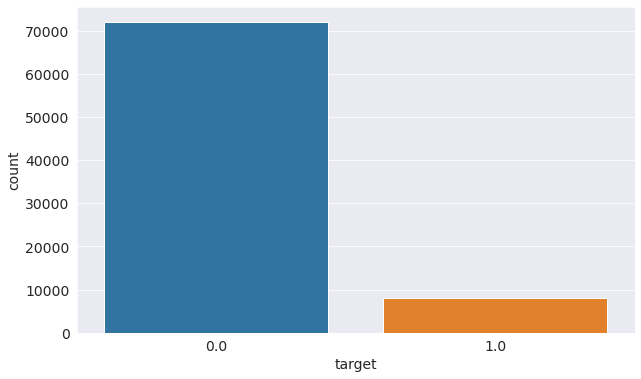

In [ ]:
sns.countplot(train_df.target);

With the help of above plot, we can clearly observe that target having value 0 is more than seven times the value of target equals to 1.

### Test Data Frame

In [ ]:
test_df.sample(20)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
105819,test_105819,10.2477,6.1726,11.1326,8.7236,11.1880,-3.6826,6.3944,19.1657,5.5310,6.8169,1.0385,-4.5772,13.7222,15.3274,7.9203,14.5415,10.9257,-10.5737,35.7018,10.5978,7.9363,10.8885,8.1199,2.6410,8.2990,13.5986,-1.0900,0.2872,6.8387,2.6646,-10.4504,9.0090,1.2519,19.4660,10.7905,8.4151,-5.0854,6.1202,9.1519,-3.1189,4.0691,8.3463,10.7216,11.5849,-5.4295,8.6985,11.6118,-10.7369,10.6074,10.9132,11.9708,9.8011,3.7585,5.7190,9.3781,14.8350,10.7546,6.4428,6.5510,7.5390,13.1835,-26.3168,4.1247,0.3603,5.4938,2.3755,7.0240,15.3012,5.0078,0.3723,16.5761,0.5912,-2.1522,22.1295,3.8977,25.5135,2.0930,15.4708,3.2739,15.0345,-14.0906,16.6521,6.1273,-7.6518,2.9590,17.8315,-1.9896,11.7971,9.4230,2.7313,10.3796,7.2854,18.0673,10.6872,12.5821,-0.6256,4.1966,22.6687,1.3191,-5.0855,-5.2485,9.8821,28.7925,1.5802,9.7895,4.5444,6.7689,8.9946,14.5055,10.9107,3.0761,8.1958,5.1911,2.1181,1.5988,-0.0971,5.2181,12.1309,-9.8775,7.3720,-2.7942,10.5598,7.6541,14.2418,0.1471,12.1256,13.9592,3.4006,1.9899,17.1333,13.8709,-0.4596,11.0530,6.5597,-8.4027,2.7753,23.1700,21.3306,0.9820,5.0051,5.8289,6.8755,11.3083,7.8595,9.0885,12.3951,8.8769,-2.0649,3.8514,-1.3303,14.2066,6.3555,5.9556,13.7393,-4.4542,-4.8349,13.7495,0.6201,26.3230,11.7530,14.7400,5.2769,5.8540,5.5133,7.4670,17.9699,3.7266,-6.3352,7.8514,5.4050,-4.1165,10.5637,27.5978,-6.3584,17.6138,9.8160,15.7938,16.1819,1.2244,4.0789,-0.8618,8.2450,-2.8228,5.7730,16.7741,1.1438,10.8872,-19.3005,18.5339,1.5780,9.9994,5.9240,4.4799,5.3027,11.1087,-0.8496,5.4746,9.3130,14.3215,-6.0116
25073,test_25073,7.6948,3.3800,11.8973,5.3069,9.2827,1.6182,5.8961,14.3395,-5.6040,6.5495,6.7529,-8.0581,14.1316,14.0423,10.9802,14.4799,9.5422,-7.7508,9.3390,11.1148,11.3651,26.2047,11.0899,2.4692,9.0252,14.0252,-3.1093,-1.2529,5.7872,3.1463,-13.8778,9.5860,-4.8917,20.3175,12.2773,11.3028,4.6098,7.6250,2.5830,2.2580,-11.0323,5.1470,9.7424,11.7505,0.0608,-31.6068,14.7644,-10.7006,25.2159,2.8468,12.1344,25.2479,2.1954,5.8473,12.1050,15.6172,14.3777,6.5855,0.7236,7.5846,6.1719,-7.3313,0.3686,-3.8179,5.2366,5.8965,4.3390,0.3844,5.0252,-3.8652,39.1187,0.5500,1.3716,9.1191,11.1113,24.3078,-2.0960,16.2446,9.5939,14.8496,7.9771,16.1826,-3.3283,-9.1620,4.7273,21.6231,9.0581,9.0223,6.0974,-4.6847,-29.0405,6.8498,8.7375,10.5243,8.7122,-1.0674,17.5815,17.2154,3.4162,2.3000,13.2278,13.4685,19.5568,1.5427,11.9697,4.9860,9.6523,13.7996,14.0485,18.1428,-1.5221,6.7530,2.6417,13.3171,4.4922,-0.2815,2.5388,13.2307,-12.8395,6.8657,30.9001,11.1261,1.5175,9.7899,5.9431,12.0724,12

In [ ]:
test_df.shape

(200000, 201)

Test set is having one column less than the training set which is obviously the target column. Which  we are going to predict

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [ ]:
test_df.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000

In [ ]:
test_df.isnull().sum().sum()

0

### Input and Target Columns
Let's select the columns that we'll use for training.

In [ ]:
target_cols = 'target'
input_cols =  ['var_81','var_12','var_53','var_139','var_99','var_170','var_146','var_44','var_80','var_166','var_177','var_6','var_174','var_110','var_26','var_109','var_198','var_190','var_22','var_21','var_133','var_148','var_179','var_0','var_86']

#### Making Validation and Training Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
%%time
X_train, X_val = train_test_split(train_df, test_size=0.2, random_state=42)

CPU times: user 14.4 ms, sys: 962 µs, total: 15.4 ms
Wall time: 14.5 ms


In [ ]:
X_train

,target,var_0,var_6,var_12,var_21,var_22,var_26,var_44,var_53,var_80,var_81,var_86,var_99,var_109,var_110,var_133,var_139,var_146,var_148,var_166,var_170,var_174,var_177,var_179,var_190,var_198
3822,0.0,12.632812,6.007812,14.140625,31.078125,2.646484,-4.285156,7.265625,5.542969,16.875000,13.015625,10.921875,-0.822754,25.156250,6.351562,7.546875,24.796875,9.789062,3.720703,3.031250,3.894531,29.765625,10.117188,-0.866211,-0.666992,16.203125
35562,0.0,7.644531,3.634766,14.179688,25.031250,5.398438,7.054688,6.523438,6.507812,4.199219,15.492188,15.000000,-0.629395,22.500000,3.615234,6.531250,-7.105469,13.453125,3.810547,3.384766,3.310547,31.390625,8.820312,1.803711,0.164185,13.570312
4883,0.0,13.125000,5.761719,13.953125,12.164062,0.261963,1.385742,8.906250,5.121094,10.429688,18.125000,9.265625,-1.152344,20.968750,4.765625,6.769531,19.171875,9.734375,4.488281,2.976562,-7.621094,9.429688,12.945312,0.198975,7.886719,13.117188
71170,1.0,9.953125,5.269531,14.195312,22.718750,4.226562,-4.910156,1.916016,6.457031,-0.563477,18.625000,10.414062,-2.498047,16.328125,6.695312,7.296875,2.435547,7.011719,3.955078,3.615234,7.695312,19.125000,6.601562,-2.480469,1.335938,7.859375
25665,0.0,7.785156,4.878906,14.265625,12.039062,6.718750,1.602539,4.906250,5.062500,19.781250,12.585938,-9.132812,-1.923828,21.218750,2.015625,7.343750,10.507812,12.781250,4.066406,2.583984,0.104309,21.890625,15.625000,-0.771484,13.375000,15.867188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.0,15.312500,4.921875,13.710938,20.234375,7.046875,-5.792969,15.585938,6.835938,2.207031,12.789062,2.773438,1.093750,26.046875,6.605469,7.039062,2.894531,11.765625,3.865234,2.730469,1.830078,12.312500,13.468750,1.748047,3.828125,17.562500
54886,0.0,8.484375,6.265625,13.929688,26.015625,5.835938,-13.500000,1.254883,6.777344,14.546875,13.414062,8.906250,-1.386719,16.875000,2.830078,6.972656,18.656250,9.625000,3.640625,3.115234,-0.037292,32.375000,10.562500,-0.840820,5.812500,15.062500
76820,0.0,6.113281,4.609375,14.164062,4.964844,4.859375,-0.803223,11.585938,5.226562,5.972656,16.078125,-1.278320,-2.634766,19.296875,10.492188,7.152344,16.265625,14.296875,4.113281,2.714844,-6.308594,27.875000,13.390625,-2.419922,5.269531,13.195312
860,0.0,16.312500,6.292969,14.148438,12.500000,4.062500,-6.625000,10.476562,6.375000,17.343750,15.804688,8.867188,1.226562,19.343750,-1.490234,7.714844,12.828125,8.281250,3.667969,3.339844,-1.751953,24.921875,12.312500,-0.428467,6.617188,15.796875


In [ ]:
X_val

,target,var_0,var_6,var_12,var_21,var_22,var_26,var_44,var_53,var_80,var_81,var_86,var_99,var_109,var_110,var_133,var_139,var_146,var_148,var_166,var_170,var_174,var_177,var_179,var_190,var_198
47044,0.0,11.546875,6.203125,13.937500,13.539062,2.273438,-9.984375,7.375000,7.136719,10.531250,12.742188,5.750000,0.595215,21.046875,14.210938,6.984375,14.437500,9.867188,3.939453,3.179688,-1.981445,23.125000,11.320312,2.929688,4.382812,14.835938
44295,0.0,10.062500,5.554688,13.820312,22.093750,6.937500,-7.746094,8.054688,6.320312,0.331543,14.867188,9.085938,-0.849609,21.359375,5.562500,6.347656,12.531250,8.156250,3.781250,2.781250,8.398438,16.343750,15.718750,2.541016,0.869629,19.718750
74783,0.0,11.234375,4.707031,13.679688,18.578125,7.773438,-3.808594,8.789062,6.320312,-3.935547,14.515625,10.218750,-2.958984,19.453125,2.476562,7.109375,15.734375,10.656250,3.851562,2.859375,3.250000,29.281250,12.195312,5.472656,-1.102539,14.031250
70975,0.0,18.828125,6.503906,14.023438,8.226562,2.269531,-6.222656,13.796875,6.117188,-6.863281,15.734375,-0.503418,-2.390625,19.625000,7.968750,7.093750,6.671875,12.859375,4.109375,3.255859,7.507812,17.906250,14.515625,1.380859,0.270752,17.046875
46645,0.0,13.078125,6.253906,14.195312,12.117188,2.603516,-9.742188,5.816406,6.835938,8.710938,15.789062,5.843750,-2.517578,14.609375,7.050781,6.531250,0.493652,8.343750,4.054688,3.728516,-1.603516,13.882812,16.515625,1.456055,2.144531,17.562500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67666,0.0,4.953125,5.523438,14.187500,13.992188,6.617188,-8.476562,0.159912,5.882812,11.765625,13.679688,6.152344,-2.636719,22.203125,7.121094,6.496094,2.712891,8.773438,4.171875,3.519531,-4.503906,20.140625,10.054688,-0.370117,-5.230469,14.570312
51146,1.0,7.429688,5.839844,14.007812,15.062500,10.664062,-6.632812,18.125000,5.828125,5.816406,11.039062,-5.382812,-0.389404,21.640625,10.914062,6.429688,14.539062,6.816406,4.066406,2.923828,9.000000,12.593750,10.312500,4.945312,2.650391,18.109375
42494,0.0,7.941406,5.726562,13.960938,10.125000,8.937500,-1.838867,-2.767578,6.566406,14.710938,12.867188,7.750000,-3.476562,23.765625,4.558594,6.957031,-8.617188,9.367188,4.503906,3.103516,-5.613281,14.679688,14.250000,3.074219,4.679688,12.460938
52517,0.0,12.945312,4.917969,14.007812,23.359375,-1.397461,0.042206,8.812500,6.359375,11.328125,14.804688,13.054688,-3.199219,28.062500,1.789062,7.355469,20.859375,10.765625,4.046875,3.171875,-2.800781,16.953125,10.507812,2.791016,10.007812,15.476562


#### Scaling the training and validation data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(train_df[input_cols])

In [ ]:
%%time
X_train[input_cols] = scaler.transform(X_train[input_cols])

CPU times: user 52.6 ms, sys: 39 µs, total: 52.6 ms
Wall time: 50.7 ms


In [ ]:
%%time
X_val[input_cols] = scaler.transform(X_val[input_cols])

CPU times: user 18.1 ms, sys: 2.93 ms, total: 21 ms
Wall time: 22.5 ms


#### Accuracy score

Let's import accuracy_score for checking the accuracies of our models.

In [ ]:
from sklearn.metrics import accuracy_score

#### Lets try some random guesses on training and validation set

In [ ]:
def random_guess(inputs):
    return np.random.choice([0, 1], len(inputs))

In [ ]:
accuracy_score(X_train[target_cols], random_guess(X_train[input_cols]))

0.5018125

In [ ]:
accuracy_score(X_val[target_cols], random_guess(X_val[input_cols]))

0.499875

As expected, accuracy score is about 50% for a model which will guess randomly.

### Logistic Regression

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

> we take linear combination (or weighted sum of the input features)

> we apply the sigmoid function to the result to obtain a number between 0 and 1

> this number represents the probability of the input being classified as "Yes"

> Instead of RMSE, the accuracy score is used to evaluate the results

In [ ]:
from sklearn.linear_model import LogisticRegression

Let's train the model with some hyperparamters at the start.

In [ ]:
%%time
model = LogisticRegression(n_jobs = -1, random_state = 42).fit(X_train[input_cols], X_train[target_cols])

CPU times: user 48.5 ms, sys: 66.9 ms, total: 115 ms
Wall time: 1.78 s


predicting value of our model on training set.

In [ ]:
preds_train = model.predict(X_train[input_cols])
preds_train

array([0., 0., 0., ..., 0., 0., 0.], dtype=float16)

predicting value of our model on validation set.

In [ ]:
preds_val = model. predict(X_val[input_cols])

lets have a look at the accuracy score as well.

In [ ]:
accuracy_score(preds_train, X_train[target_cols])

0.902203125

In [ ]:
accuracy_score(preds_val, X_val[target_cols])

0.89975

Current accuracy score on validation set is 0.89975 which looks like a satisfactory result. Let's try whether we can make it more better

Let's find out the value of weights and value of intercept of above model

In [ ]:
print(model.coef_.tolist())

[[-1.753723776581796, -1.4381114679296103, 1.2345337649459593, -1.6867804615188724, 1.159596548270732, 1.205534400269821, -1.4633617175685212, -1.1510980460297244, -1.291147244669821, -1.208713620042879, -0.7264587830569017, 1.419187537519962, -1.147818567665359, 1.5089065962300046, 1.455606019983175, -0.8563503035076045, -1.149397621306136, 1.3366739689755287, 1.2465879114999252, -1.369447598145974, 1.2032033350453164, -1.2056025759982443, 1.2226121274837176, 0.9821906047734082, -0.9445566088479247]]


In [ ]:
print(model.intercept_)

[-1.26035301]


### Hyperparameters Tuning

We don't have many useful parameters which can be used with the default logistic regression model. But, still let's try to do something crazy with the model.

In [ ]:
def test_params_lr(**params):
    model = LogisticRegression(n_jobs=-1, random_state=42, **params)
    model.fit(X_train[input_cols], X_train[target_cols])
    a1 = model.predict(X_train[input_cols])
    b1 = model.predict(X_val[input_cols])
    train_acs = accuracy_score(X_train[target_cols], a1)
    val_acs = accuracy_score(X_val[target_cols], b1)
    print('Train Accuracy Score: {}, Validation Accuracy Score: {}'.format(train_acs, val_acs))

In [ ]:
test_params_lr()

Train Accuracy Score: 0.902203125, Validation Accuracy Score: 0.89975


##### Solver

In [ ]:
test_params_lr(solver = 'liblinear')

Train Accuracy Score: 0.902171875, Validation Accuracy Score: 0.89975


Accuracy score is same on validation set and almost similar on training set

In [ ]:
test_params_lr(solver = 'sag')

Train Accuracy Score: 0.902203125, Validation Accuracy Score: 0.89975


In [ ]:
test_params_lr(solver = 'saga')

Train Accuracy Score: 0.902203125, Validation Accuracy Score: 0.89975


In [ ]:
test_params_lr(solver = 'newton-cg')

Train Accuracy Score: 0.902203125, Validation Accuracy Score: 0.89975


All the solvers are giving us almost the same value of accuracy score on training set and exactly same score on validation set.

##### multi_class

test_params(multi_class = 'auto')

In [ ]:
test_params_lr(multi_class = 'ovr')

Train Accuracy Score: 0.902203125, Validation Accuracy Score: 0.89975


In [ ]:
test_params_lr(multi_class = 'multinomial')

Train Accuracy Score: 0.9020625, Validation Accuracy Score: 0.89975


Again, multi_class parameter hasn't given us any significant change in the accuracy score.

##### max_iter

In [ ]:
test_params_lr(max_iter = 50)

Train Accuracy Score: 0.902203125, Validation Accuracy Score: 0.89975


In [ ]:
test_params_lr(max_iter = 150)

Train Accuracy Score: 0.902203125, Validation Accuracy Score: 0.89975


In [ ]:
test_params_lr(max_iter = 1000)

Train Accuracy Score: 0.902203125, Validation Accuracy Score: 0.89975


After changing values of max_iter has also not given us any significant change

##### penalty

In [ ]:
test_params_lr(solver = 'liblinear', penalty = 'l1')

Train Accuracy Score: 0.902109375, Validation Accuracy Score: 0.899875


In [ ]:
test_params_lr(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.4)

Train Accuracy Score: 0.902203125, Validation Accuracy Score: 0.89975


In [ ]:
test_params_lr( penalty = 'none')

Train Accuracy Score: 0.902109375, Validation Accuracy Score: 0.8998125


penalty is also not able to help us

So, we'll go with our default model with solver = 'lbfgs' and other parameters also equals to their default value. With default model we got the best accuracy score. The best accuracy score is again shown on the next cell.

In [ ]:
test_params_lr()

Train Accuracy Score: 0.902203125, Validation Accuracy Score: 0.89975


#### Gradient Boosting
We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

>1) The average value of the target column and uses as an initial prediction every input.

>2) The residuals (difference) of the predictions with the targets are computed.

>3) A decision tree of limited depth is trained to predict just the residuals for each input.

>4) Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)

>5) Scaled predictions fro the tree are added to the previous predictions to obtain the new and improved predictions.

>6) Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model.

Importing XGBClassifier from xgboost

In [ ]:
from xgboost import XGBClassifier

setting some hyperparameters

In [ ]:
model = XGBClassifier(random_state = 42, n_jobs = -1)

In [ ]:
%%time
model.fit(X_train[input_cols], X_train[target_cols])

CPU times: user 19.5 s, sys: 24.2 ms, total: 19.5 s
Wall time: 10 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

predicting the target values and accuracy score of model on training set.

In [ ]:
preds = model.predict(X_train[input_cols])

In [ ]:
accuracy_score(preds, X_train.target)

0.93859375

#### Importances of different features

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train[input_cols].columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
imp_small_part = importance_df.head(10)
imp_small_part

,feature,importance
1,var_12,0.053067
0,var_81,0.052204
2,var_53,0.044670
3,var_139,0.044426
6,var_146,0.042010
4,var_99,0.041476
21,var_148,0.040868
19,var_21,0.040458
11,var_6,0.040370
14,var_26,0.040221


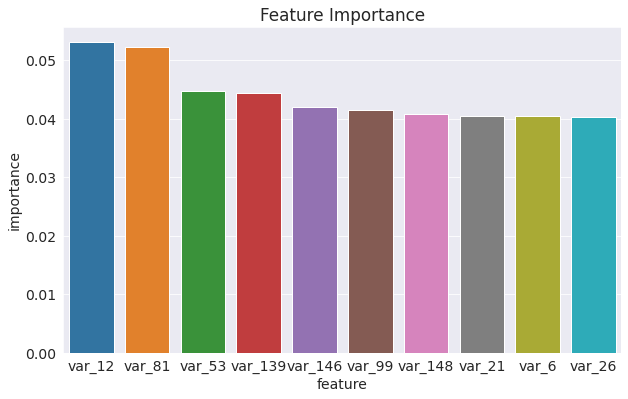

In [ ]:
plt.title('Feature Importance')
sns.barplot(data = imp_small_part,x = 'feature', y = 'importance');

With the help of above plot, we can say that var_12 and var_81 are the most important features and other features are also trailing behind with a very minute margin.

#### Making prediction on validation set

In [ ]:
preds_val = model.predict(X_val[input_cols])

In [ ]:
accuracy_score(preds_val,X_val.target)

0.8965625

Current accuracy score on validation set is 0.8965625 without the tuning of hyperparameters

### Hyperparameters Tuning

#### Lets define a function for finding out best value for max_depth_error.

In [ ]:
def max_depth_error(md):
    model = XGBClassifier(max_depth=md, random_state=42)
    model.fit(X_train[input_cols], X_train[target_cols])
    preds_train = model.predict(X_train[input_cols])
    preds_val = model.predict(X_val[input_cols])
    acs_train = accuracy_score(preds_train,X_train[target_cols])
    acs_val = accuracy_score(preds_val,X_val[target_cols])
    return {'Max Depth': md, 'Training Accuracy Score': acs_train, 'Validation Accuracy Score': acs_val}

In [ ]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 11)])

CPU times: user 3min 19s, sys: 341 ms, total: 3min 19s
Wall time: 1min 45s


In [ ]:
errors_df

,Max Depth,Training Accuracy Score,Validation Accuracy Score
0,1,0.902250,0.899875
1,2,0.907078,0.901125
2,3,0.911266,0.900062
3,4,0.917547,0.898937
4,5,0.926016,0.899813
5,6,0.938594,0.896563
6,7,0.956313,0.896750
7,8,0.974391,0.895625
8,9,0.989031,0.896125
9,10,0.996125,0.895375


With the help of above data frame, we can select max_depth = 5

We just saw how a function helped us to find out the value of max_depth.
So, Lets define a function which will take care of more than 1 hyperparameter in a single line of code.

In [ ]:
def test_params(**params):
    model = XGBClassifier(n_jobs=-1, random_state=42, **params)
    model.fit(X_train[input_cols], X_train[target_cols])
    train_acs = accuracy_score(model.predict(X_train[input_cols]), X_train[target_cols])
    val_acs = accuracy_score(model.predict(X_val[input_cols]), X_val[target_cols])
    print('Training Accuracy Score : {}, Validation Accuracy Score: {}'.format(train_acs, val_acs))

#### Trying to find out best learning rate

In [ ]:
%%time
test_params(learning_rate = 0.01, max_depth = 5)

Training Accuracy Score : 0.90025, Validation Accuracy Score: 0.8975
CPU times: user 15.6 s, sys: 18.1 ms, total: 15.7 s
Wall time: 7.96 s


In [ ]:
%%time
test_params(learning_rate = 0.1, max_depth = 5)

Training Accuracy Score : 0.9155, Validation Accuracy Score: 0.901
CPU times: user 16.8 s, sys: 22 ms, total: 16.8 s
Wall time: 8.6 s


In [ ]:
%%time
test_params(learning_rate = 0.15, max_depth = 5)

Training Accuracy Score : 0.92075, Validation Accuracy Score: 0.8999375
CPU times: user 15.3 s, sys: 16.3 ms, total: 15.3 s
Wall time: 7.72 s


In [ ]:
%%time
test_params(learning_rate = 0.20, max_depth = 5)

Training Accuracy Score : 0.921796875, Validation Accuracy Score: 0.8986875
CPU times: user 15 s, sys: 19.1 ms, total: 15 s
Wall time: 7.66 s


In [ ]:
%%time
test_params(learning_rate = 0.3, max_depth = 5)

Training Accuracy Score : 0.926015625, Validation Accuracy Score: 0.8998125
CPU times: user 15.8 s, sys: 23.2 ms, total: 15.8 s
Wall time: 8.02 s


In [ ]:
%%time
test_params(learning_rate = 0.5, max_depth = 4)

Training Accuracy Score : 0.922, Validation Accuracy Score: 0.8973125
CPU times: user 12.3 s, sys: 12.1 ms, total: 12.3 s
Wall time: 6.21 s


In [ ]:
%%time
test_params(learning_rate = 0.7, max_depth = 5)

Training Accuracy Score : 0.945453125, Validation Accuracy Score: 0.885875
CPU times: user 15.8 s, sys: 16.2 ms, total: 15.8 s
Wall time: 7.94 s


In [ ]:
%%time
test_params(learning_rate = 0.9, max_depth = 4)

Training Accuracy Score : 0.928390625, Validation Accuracy Score: 0.8864375
CPU times: user 12.2 s, sys: 16 ms, total: 12.3 s
Wall time: 6.2 s


In [ ]:
%%time
test_params(learning_rate = 0.99, max_depth = 5)

Training Accuracy Score : 0.9518125, Validation Accuracy Score: 0.874875
CPU times: user 15.6 s, sys: 8.16 ms, total: 15.6 s
Wall time: 7.92 s


In [ ]:
%%time
test_params(learning_rate = 0.05, max_depth = 5)

Training Accuracy Score : 0.905734375, Validation Accuracy Score: 0.8995625
CPU times: user 16 s, sys: 24.8 ms, total: 16.1 s
Wall time: 8.31 s


In [ ]:
%%time
test_params(learning_rate = 0.12, max_depth = 5)

Training Accuracy Score : 0.91796875, Validation Accuracy Score: 0.9006875
CPU times: user 17.3 s, sys: 21 ms, total: 17.3 s
Wall time: 8.78 s


In [ ]:
%%time
test_params(learning_rate = 0.08, max_depth = 5)

Training Accuracy Score : 0.91203125, Validation Accuracy Score: 0.900375
CPU times: user 16.8 s, sys: 22 ms, total: 16.8 s
Wall time: 8.56 s


In [ ]:
%%time
test_params(learning_rate = 0.09, max_depth = 5)

Training Accuracy Score : 0.913984375, Validation Accuracy Score: 0.90175
CPU times: user 17.8 s, sys: 21 ms, total: 17.8 s
Wall time: 8.96 s


With the help of above brute force technique to find out the best value of learning rate, we got learning_rate = 0.1

#### Trying to find out best n_estimator

In [ ]:
%%time
errors_df = pd.DataFrame([test_params(n_estimators = md, learning_rate = 0.1, max_depth = 4) for md in range(10, 251, 30)])

Training Accuracy Score : 0.900015625, Validation Accuracy Score: 0.8974375
Training Accuracy Score : 0.90125, Validation Accuracy Score: 0.897875
Training Accuracy Score : 0.905375, Validation Accuracy Score: 0.90025
Training Accuracy Score : 0.909203125, Validation Accuracy Score: 0.901375
Training Accuracy Score : 0.911609375, Validation Accuracy Score: 0.9006875
Training Accuracy Score : 0.91353125, Validation Accuracy Score: 0.90025
Training Accuracy Score : 0.91509375, Validation Accuracy Score: 0.900375
Training Accuracy Score : 0.91621875, Validation Accuracy Score: 0.9006875
Training Accuracy Score : 0.916859375, Validation Accuracy Score: 0.90025
CPU times: user 2min 25s, sys: 167 ms, total: 2min 25s
Wall time: 1min 15s


In [ ]:
test_params(n_estimators = 130, learning_rate = 0.09, max_depth = 5)

Training Accuracy Score : 0.91784375, Validation Accuracy Score: 0.900875


In [ ]:
test_params(n_estimators = 120, learning_rate = 0.09, max_depth = 5)

Training Accuracy Score : 0.916546875, Validation Accuracy Score: 0.9014375


In [ ]:
test_params(n_estimators = 140, learning_rate = 0.09, max_depth = 5)

Training Accuracy Score : 0.91865625, Validation Accuracy Score: 0.900875


In [ ]:
test_params(n_estimators = 110, learning_rate = 0.09, max_depth = 5)

Training Accuracy Score : 0.915453125, Validation Accuracy Score: 0.9015625


In [ ]:
test_params(n_estimators = 100, learning_rate = 0.09, max_depth = 5)

Training Accuracy Score : 0.913984375, Validation Accuracy Score: 0.90175


In [ ]:
test_params(n_estimators = 115, learning_rate = 0.09, max_depth = 5)

Training Accuracy Score : 0.916, Validation Accuracy Score: 0.901375


We can clearly observe from above 10 cells that best value for n_estimators is 120 for getting the lowest value of rmse of validation set.

#### Lets also try booster = gbliner

In [ ]:
test_params(booster='gblinear')

Training Accuracy Score : 0.902125, Validation Accuracy Score: 0.899625


## Model with Best Parameters

In [ ]:
test_params(n_estimators = 120, learning_rate = 0.09, max_depth = 5)

Training Accuracy Score : 0.916546875, Validation Accuracy Score: 0.9014375


**Accuracy Score on validation set is 0.9014375 with our best model** and above model is the best model out of the many models we tried by changing values of many hyperparameters in both Logistic Regression as well as in XGBoost.

### Summary

> I first downloaded the dataset with the help of opendatasets and used some hyperparamters while reading the train.csv so that the model runs instantaneously without taking much time.

> I used Logistic Regression as our first model, and also changed some parameters but changing the values of hyperparameters only disappointed us, as it didn't give a significant change in the values of rmse and accuracy score

> As my Second Model, I took XGBoost for predicting the target value. I also changed some hyperparameters and at the last also shown the best value of accuracy score with the best model after changing some parameters

### References:

> https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/logistic-regression-for-classification

> https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/gradient-boosting-with-xgboost


### Ideas for Future Work

> With a better cpu or a good gpu, we can also take more columns and rows from train.csv. And with more data, probably rmse value will may get better

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="machine-learning-project")

<IPython.core.display.Javascript object>